## AIRCRAFT ANALYSIS-AVIATION SAFETY INSIGHTS from U.S Aviation Accident Data


Author: Sharon Kipruto


# Introduction

Skysafe Analytics Ltd. is expanding into the Aviation industry . For this reason they need to make good decisions on acquiring and operating airplanes for commercial and private enterprises using the recomendations given by us. As they do not know the potential risks involved in the aviation industry, we need to analyze for them the Aviation Data from U.S National Transportation Safety Board(NTSB) to give recomendations.
We will do so by exploring, cleaning and studying the Data and use our findings to form actionable insights to the new Aviation department in Skysafe Analytics Ltd. This advice should help them pick safer aircrafts that will kickstart their new business venture to success.


# DATA UNDERSTANDING

This project relies from data from Kaggle,

# 1. DATA EXPLORATION

We load the dataset to understand its structure, contents, size and summary

In [1064]:
#importing relevant libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.available
plt.style.use('ggplot')

In [1065]:
#importing data into dataframe

df=pd.read_csv('./Data/AviationData.csv' , encoding='Latin1', low_memory=False)

#display for the first 5 rows
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [1066]:
#display the last 5 rows
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [1067]:
#display the shape of the data to check number of rows and columns in the dataset

df.shape

(88889, 31)

In [1068]:
#display the available columns of the dataset
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [1069]:
#checking summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [1070]:
#display the descriptive statististic to get the overview of the distributions and transform to make it readable
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number.of.Engines,82805.0,1.146585,0.446510,0.0,1.0,1.0,1.0,8.0
Total.Fatal.Injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
Total.Serious.Injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
Total.Minor.Injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
Total.Uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0


In [1071]:
#check for number of unique values in the dataset

print(f'The number of unique values in each column is:')


df.nunique()

The number of unique values in each column is:


Event.Id                  87951
Investigation.Type            2
Accident.Number           88863
Event.Date                14782
Location                  27758
Country                     219
Latitude                  25589
Longitude                 27154
Airport.Code              10375
Airport.Name              24871
Injury.Severity             109
Aircraft.damage               4
Aircraft.Category            15
Registration.Number       79105
Make                       8237
Model                     12318
Amateur.Built                 2
Number.of.Engines             7
Engine.Type                  13
FAR.Description              31
Schedule                      3
Purpose.of.flight            26
Air.carrier               13590
Total.Fatal.Injuries        125
Total.Serious.Injuries       50
Total.Minor.Injuries         57
Total.Uninjured             379
Weather.Condition             4
Broad.phase.of.flight        12
Report.Status             17075
Publication.Date           2924
dtype: i

In [1072]:
#check for duplicates

duplicates=df.duplicated().sum()

print(f'The number of duplicated values is:{duplicates}')

The number of duplicated values is:0


In [1073]:
#check missing values

df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [1074]:
#sort percentage of null values from the highest

(df.isna().sum()/len(df)*100).sort_values(ascending=False)

Schedule                  85.845268
Air.carrier               81.271023
FAR.Description           63.974170
Aircraft.Category         63.677170
Longitude                 61.330423
Latitude                  61.320298
Airport.Code              43.469946
Airport.Name              40.611324
Broad.phase.of.flight     30.560587
Publication.Date          15.492356
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Fatal.Injuries      12.826109
Engine.Type                7.961615
Report.Status              7.178616
Purpose.of.flight          6.965991
Number.of.Engines          6.844491
Total.Uninjured            6.650992
Weather.Condition          5.053494
Aircraft.damage            3.593246
Registration.Number        1.481623
Injury.Severity            1.124999
Country                    0.254250
Amateur.Built              0.114750
Model                      0.103500
Make                       0.070875
Location                   0.058500
Event.Date                 0

* Conclusion on the Data Exploration

The aviation dataset contains a mix of numerical and categorical data relating to the aviation accidents.
The data has alot of missing values in some columns hence it will need some cleaning.




# 2.DATA CLEANING

In this section we will focus on cleaning the data by converting data to their correct types for consistency, cleaning the columns for readability, dealing with null values (categorical and numerical values) for reliability of the analysis.

# 2.1 Convert the dates to Datetime 

The event_Date and Publication_Date are both scored under Object data type which is not the corect type for dates,we need to convert into proper Datetime format to enable time-based analysis.

In [1075]:
#check how the dates were before
df.loc[:, ['Event.Date', 'Publication.Date']].head()

,Event.Date,Publication.Date
0,1948-10-24,NaN
1,1962-07-19,19-09-1996
2,1974-08-30,26-02-2007
3,1977-06-19,12-09-2000
4,1979-08-02,16-04-1980


In [1076]:
#convert Event.Date and publication.date to date time since they are scored as objects

df["Event.Date"] = pd.to_datetime(df["Event.Date"], errors="coerce")
df["Publication.Date"] = pd.to_datetime(df["Publication.Date"], errors="coerce")

In [1077]:
#confirm the changes
df.loc[:, ['Event.Date', 'Publication.Date']].head()

,Event.Date,Publication.Date
0,1948-10-24,NaT
1,1962-07-19,1996-09-19
2,1974-08-30,2007-02-26
3,1977-06-19,2000-12-09
4,1979-08-02,1980-04-16


The dates have been changed accordingly.

# 2.2 Clean the columns

In [1078]:
#clean the column names for easy access and readability
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

a) standadize column names 

In [1079]:
#strip spaces,make it title case ,replace spaces with underscore and replace dot with underscore
df.columns=(df.columns.str.strip().str.title().str.replace(' ','_').str.replace('.','_'))

#check new column names 
df.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_Damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_Of_Engines', 'Engine_Type', 'Far_Description',
       'Schedule', 'Purpose_Of_Flight', 'Air_Carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_Phase_Of_Flight', 'Report_Status',
       'Publication_Date'],
      dtype='object')

b)Extracting new column names and adding to our dataset

It is important to our data analysis that we derive new columns that are relevant, such as 'Year' ,'Month','Day_of_Week' , 'Total_Injuries' and 'Aircraft type'.Also we will create a column named 'Year_10' that will hold 10 year intervals that will be relavant when analysing the trends overtime.

In [1080]:
#Extract year, month and day_of_week from the ['Event_Date] column for easy analysis
df['Year']=df['Event_Date'].dt.year
df['Month']=df['Event_Date'].dt.month
df['Day_of_Week']=df['Event_Date'].dt.day_name()


In [1081]:
#preview after extracting the year day of week and month
df.loc[:, ['Event_Date','Year','Month','Day_of_Week']].head()

,Event_Date,Year,Month,Day_of_Week
0,1948-10-24,1948,10,Sunday
1,1962-07-19,1962,7,Thursday
2,1974-08-30,1974,8,Friday
3,1977-06-19,1977,6,Sunday
4,1979-08-02,1979,8,Thursday


In [1082]:
# Create column for 10-year intervals
df['Years_10'] = (df['Year'] // 10) * 10

In [1083]:
df.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_Damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_Of_Engines', 'Engine_Type', 'Far_Description',
       'Schedule', 'Purpose_Of_Flight', 'Air_Carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_Phase_Of_Flight', 'Report_Status',
       'Publication_Date', 'Year', 'Month', 'Day_of_Week', 'Years_10'],
      dtype='object')

Create a column for Total Injuries that summarises all the Injuries occured.

In [1084]:

df['Total_Injuries'] = df['Total_Serious_Injuries'] + df['Total_Minor_Injuries']

#preview after creating the Total_Injuries column
df.loc[:,['Total_Serious_Injuries','Total_Minor_Injuries','Total_Injuries']].head()

,Total_Serious_Injuries,Total_Minor_Injuries,Total_Injuries
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,NaN,NaN,NaN
3,0.0,0.0,0.0
4,2.0,NaN,NaN


The make and model of the Aircraft is an important Variable to help determine the aircraft to purchase. For the column with df['Model'] and ['Make'] of the aircrafts we will combine to form new column df['Aircraft_Type] that can be used in our analysis later.

In [1085]:
#first lets look at the first 5 rows column mentioned
df.loc[0:5,['Make','Model']]

,Make,Model
0,Stinson,108-3
1,Piper,PA24-180
2,Cessna,172M
3,Rockwell,112
4,Cessna,501
5,Mcdonnell Douglas,DC9


In [1086]:
#check for number of missing values in the columns mentioned
print(df['Model'].isnull().sum())
print(df['Make'].isna().sum())

92
63


In [1087]:
#minimize errors during concatenation convert type to string
df['Make']=df['Make'].astype(str)
df['Model']=df['Model'].astype(str)

#combine to make new column 'Aircraft_Type'
df['Aircraft_Type']=df['Make']+ ' '+ df['Model']

#replace 'nan' string values with Nan, since some values are missing in both columns
df['Aircraft_Type']=df['Aircraft_Type'].replace('nan nan',np.nan)


In [1088]:
#preview if the column is added and has a combination of make and Model
df.loc[:,['Make','Model','Aircraft_Type']].head()

,Make,Model,Aircraft_Type
0,Stinson,108-3,Stinson 108-3
1,Piper,PA24-180,Piper PA24-180
2,Cessna,172M,Cessna 172M
3,Rockwell,112,Rockwell 112
4,Cessna,501,Cessna 501


# 2.3 Dealing with missing values

In [1089]:
#sort the percentage of null values in descending order
(df.isna().sum()/len(df)*100).sort_values(ascending=False)

Schedule                  85.845268
Air_Carrier               81.271023
Far_Description           63.974170
Aircraft_Category         63.677170
Longitude                 61.330423
Latitude                  61.320298
Airport_Code              43.469946
Airport_Name              40.611324
Broad_Phase_Of_Flight     30.560587
Total_Injuries            15.809605
Publication_Date          15.492356
Total_Serious_Injuries    14.073732
Total_Minor_Injuries      13.424608
Total_Fatal_Injuries      12.826109
Engine_Type                7.961615
Report_Status              7.178616
Purpose_Of_Flight          6.965991
Number_Of_Engines          6.844491
Total_Uninjured            6.650992
Weather_Condition          5.053494
Aircraft_Damage            3.593246
Registration_Number        1.481623
Injury_Severity            1.124999
Country                    0.254250
Amateur_Built              0.114750
Location                   0.058500
Aircraft_Type              0.048375
Make                       0

A) CATEGORICAL DATA

In [1090]:
#drop full columns with above 60% null values 

df.drop(['Schedule','Air_Carrier','Far_Description','Publication_Date'], axis=1, inplace=True)



In [1091]:
#drop the rows of columns with missing values that seem important for our analysis to keep
df.dropna(subset=['Location','Country','Aircraft_Type','Longitude','Latitude'], inplace=True)

Now for the rest of the categorical v alues of data it is 

In [1092]:
#fill 'unknown' to null values in some categorial data columns
categorical_cols=['Airport_Code', "Airport_Name", "Broad_Phase_Of_Flight","Engine_Type", "Report_Status",
    "Purpose_Of_Flight", "Weather_Condition", "Aircraft_Damage",'Injury_Severity','Aircraft_Category','Registration_Number','Amateur_Built']
for col in categorical_cols:
    df[col]=df[col].fillna('Unknown')

['Weather_Condition'] column requires more manipulation to get merge the 'Unk' ,'UNK' values with 'Unknown'

In [1093]:
df['Weather_Condition'].value_counts()

VMC        30578
IMC         1821
Unknown     1727
Unk          219
UNK            1
Name: Weather_Condition, dtype: int64

In [1094]:
df['Weather_Condition'].replace('Unk','Unknown', inplace=True)
df['Weather_Condition'].replace('UNK','Unknown', inplace=True)

In [1095]:
df['Weather_Condition'].value_counts()

VMC        30578
Unknown     1947
IMC         1821
Name: Weather_Condition, dtype: int64

B) NUMERICAL DATA

Now when dealing with numerical values we need to observe what the numbers represent, In this case of injuries while assuming the best case scenario: we have assumed that the columns with null values for Injured/injuries means that no injuries were observed or reported hence filling with '0'

In [1096]:
df.loc[:,["Total_Fatal_Injuries", "Total_Serious_Injuries",
           "Total_Minor_Injuries", "Total_Uninjured",'Total_Injuries']].head()

,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Total_Injuries
2,3.0,NaN,NaN,NaN,NaN
5,NaN,NaN,1.0,44.0,NaN
593,1.0,NaN,NaN,NaN,NaN
3654,2.0,NaN,NaN,NaN,NaN
6202,2.0,NaN,NaN,NaN,NaN


In [1097]:
#fill in 0 or median to null values in columns with numerical value and convert type to interger

num_cols= ["Total_Fatal_Injuries", "Total_Serious_Injuries",
           "Total_Minor_Injuries", "Total_Uninjured",'Total_Injuries']

for col in num_cols:
    if 'Injuries' in col or col=='Total_Uninjured':
        df[col]=df[col].fillna(0)
    else: 
        df[col]=df[col].fillna(df[col].median())
    df[col]=df[col].astype(int)

In [1098]:
#check if type has been converted
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34346 entries, 2 to 88886
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Total_Fatal_Injuries    34346 non-null  int32
 1   Total_Serious_Injuries  34346 non-null  int32
 2   Total_Minor_Injuries    34346 non-null  int32
 3   Total_Uninjured         34346 non-null  int32
 4   Total_Injuries          34346 non-null  int32
dtypes: int32(5)
memory usage: 939.1 KB


Next, looking at the ['Number_of_Engines'], these values will be important to know if aircrafts with single or multiple Engines are riskier.

In [1099]:
#check value counts to see most frequent
print(df['Number_Of_Engines'].value_counts(dropna=False))

#fill the missing values of the Number of Engines with the mode[0]the first most frequent value
df['Number_Of_Engines'].fillna((df['Number_Of_Engines'].mode()[0]),inplace=True)

#convert dtype to integer
df['Number_Of_Engines']=df['Number_Of_Engines'].astype(int)

1.0    27427
2.0     4046
NaN     2212
0.0      520
4.0       88
3.0       49
8.0        3
6.0        1
Name: Number_Of_Engines, dtype: int64


In [1100]:
#recheck missing values
df.isna().sum().sort_values(ascending=False)

Aircraft_Type             0
Model                     0
Investigation_Type        0
Accident_Number           0
Event_Date                0
Location                  0
Country                   0
Latitude                  0
Longitude                 0
Airport_Code              0
Airport_Name              0
Injury_Severity           0
Aircraft_Damage           0
Aircraft_Category         0
Registration_Number       0
Make                      0
Amateur_Built             0
Total_Injuries            0
Number_Of_Engines         0
Engine_Type               0
Purpose_Of_Flight         0
Total_Fatal_Injuries      0
Total_Serious_Injuries    0
Total_Minor_Injuries      0
Total_Uninjured           0
Weather_Condition         0
Broad_Phase_Of_Flight     0
Report_Status             0
Year                      0
Month                     0
Day_of_Week               0
Years_10                  0
Event_Id                  0
dtype: int64

We  have eliminated all missing values accordingly.

# 2.4 Droping columns that are irrelevant to our analysis

Since our analysis is on giving recommendation on what aircraft is the more safer option for purchase and operation, we feel that some columns may be misleading, redundant or irrelevant for our analysis. The following columns did not make the cut:

In [1101]:
#drop columns that are not relevant to our analysis
df.drop(['Event_Id','Accident_Number','Investigation_Type','Registration_Number','Report_Status','Make','Model'], axis=1, inplace=True)

In [1102]:
#recheck the final shape we will work with
df.shape


(34346, 26)

In [1103]:
#final columns we are working with
df.columns

Index(['Event_Date', 'Location', 'Country', 'Latitude', 'Longitude',
       'Airport_Code', 'Airport_Name', 'Injury_Severity', 'Aircraft_Damage',
       'Aircraft_Category', 'Amateur_Built', 'Number_Of_Engines',
       'Engine_Type', 'Purpose_Of_Flight', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_Phase_Of_Flight', 'Year', 'Month',
       'Day_of_Week', 'Years_10', 'Total_Injuries', 'Aircraft_Type'],
      dtype='object')

In [1104]:
df.head()

,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,Injury_Severity,Aircraft_Damage,Aircraft_Category,...,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_Phase_Of_Flight,Year,Month,Day_of_Week,Years_10,Total_Injuries,Aircraft_Type
2,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,Unknown,Unknown,Fatal(3),Destroyed,Unknown,...,0,0,IMC,Cruise,1974,8,Friday,1970,0,Cessna 172M
5,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,Unknown,Unknown,Non-Fatal,Substantial,Airplane,...,1,44,VMC,Climb,1979,9,Monday,1970,0,Mcdonnell Douglas DC9
593,1982-03-16,"MOBILE, AL",United States,30.757778,-88.355555,MOB,MOBILE REGIONAL,Fatal(1),Substantial,Airplane,...,0,0,IMC,Landing,1982,3,Tuesday,1980,0,Beech C24R
3654,1983-01-08,"Goldendale, WA",United States,46.041111,-120.849722,Unknown,Unknown,Fatal(2),Destroyed,Unknown,...,0,0,VMC,Cruise,1983,1,Saturday,1980,0,Bellanca 14-19-3
6202,1983-09-09,"Kalispell, MT",United States,48.12,-113.8875,Unknown,Unknown,Fatal(2),Destroyed,Unknown,...,0,0,IMC,Cruise,1983,9,Friday,1980,0,Cessna 182N


DATA CLEANING CONCLUSION

The Aviation Dataset has been thoroughly cleaned and prepared for exportation. The final dataset we will be working with has 26 columns and 34346 rows of data. Key actions included in this section were:
* standardizing data
* dealing with missing values
* deriving columns needed for analysis 
* removing irrelevant columns

Our Dataset is now ready for export and Exploratort Data Analysis to identify the low-risk aircraft.

# 3. EXPORT CLEANED DATA FOR TABLEAU

In [1105]:
#Export new cleaned dataframe to a new csv File 
df.to_csv('Cleaned_Accident_Data.csv',index=False)

# 4. EXPLORATORY DATA ANALYSIS


The next part is essential to every project where we detect and investigate the dataset's main characteristics and study patterns with visualizations.
We will explore accident frequencies,counts and impact of type of aircraft, number of Engines, mode of flight, phases of flight to cater for SkySafe Ltd.'s goal to identify aircrafts with the least risks for acquisition.

trends over time, geographic patterns, injury distributions, phase-of-flight and weather effects, aircraft-type comparisons.  

* Accident trends overtime

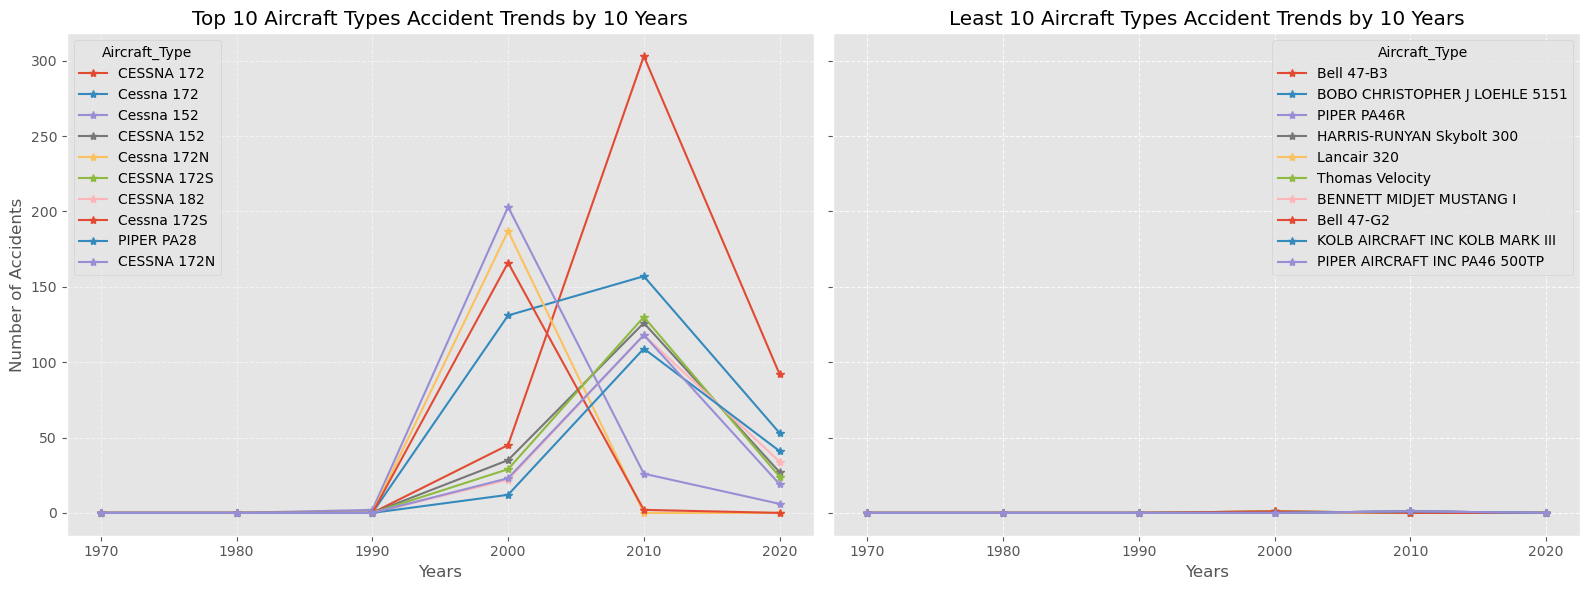

In [1106]:
# Create column for 10-year intervals
df['Years_10'] = (df['Year'] // 10) * 10

# Crosstab to count accidents by year and aircraft type
cross_high = pd.crosstab(df['Years_10'], df['Aircraft_Type'])
cross_low=pd.crosstab(df['Years_10'], df['Aircraft_Type'])

# Keep only top 10 aircraft
top_10_types = df['Aircraft_Type'].value_counts().nlargest(10).index
pivot_top_10 = cross_high[top_10_types]

#find the least 10 aircraft types
least_10_types=df['Aircraft_Type'].value_counts().nsmallest(10).index
pivot_low_10=cross_low[least_10_types]

#Plotting
fig,axes=plt.subplots(1,2, figsize=(16,6), sharey=True)

# Plot top 5 aircraft types
pivot_top_10.plot(ax=axes[0],kind='line', marker='*')
axes[0].set_title("Top 10 Aircraft Types Accident Trends by 10 Years")
axes[0].set_xlabel("Years")
axes[0].set_ylabel("Number of Accidents")
axes[0].grid(True, linestyle='--', alpha=0.5)

# Plot least 10 aircraft types
pivot_low_10.plot(ax=axes[1], kind='line', marker='*')
axes[1].set_title("Least 10 Aircraft Types Accident Trends by 10 Years")
axes[1].set_xlabel("Years")
axes[1].grid(True, linestyle='--', alpha=0.8)

plt.tight_layout()
plt.show()


This analysis shows that the Cessna aircraft types especially Cessna 172 has the highest number of accidents with peak in 1980s. Although, overtime the accident counts have declined steadily across all aircraft types hence suggesting imporovements in safety measures in aviation. 
Piper aircraft consistently registered lower accident counts 

* Aircraft type  with most Injuries

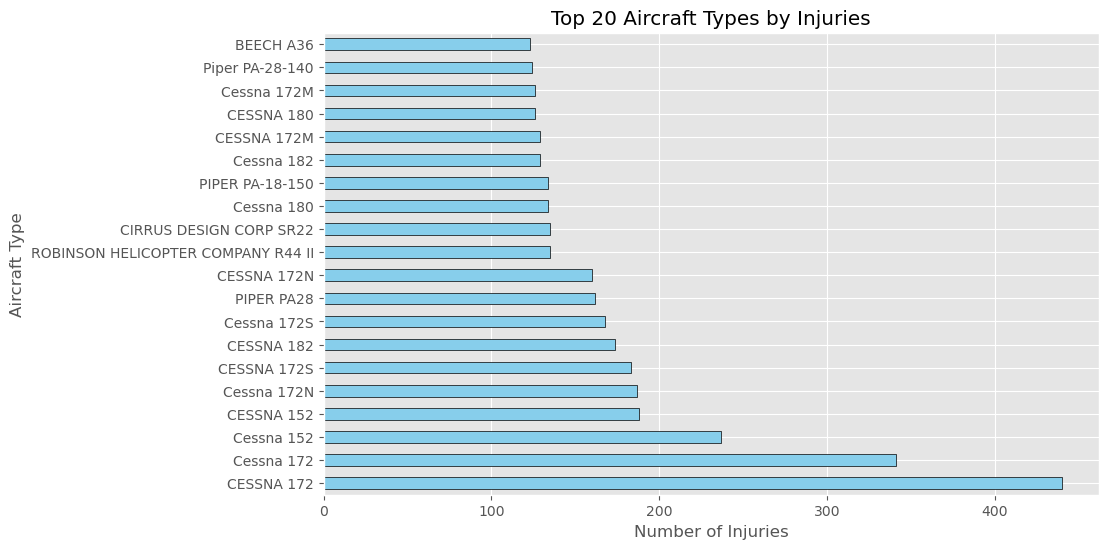

In [1107]:
#top 20 aircraft value counts by Injuries
accident_aircraft= df['Aircraft_Type'].value_counts().nlargest(20)

#plotting
plt.figure(figsize=(10, 6))

accident_aircraft.plot(kind='barh',color='skyblue', edgecolor='black')
plt.title('Top 20 Aircraft Types by Injuries')
plt.xlabel('Number of Injuries')
plt.ylabel('Aircraft Type')
plt.show()

* Fatal injuries Across Aircraft Types

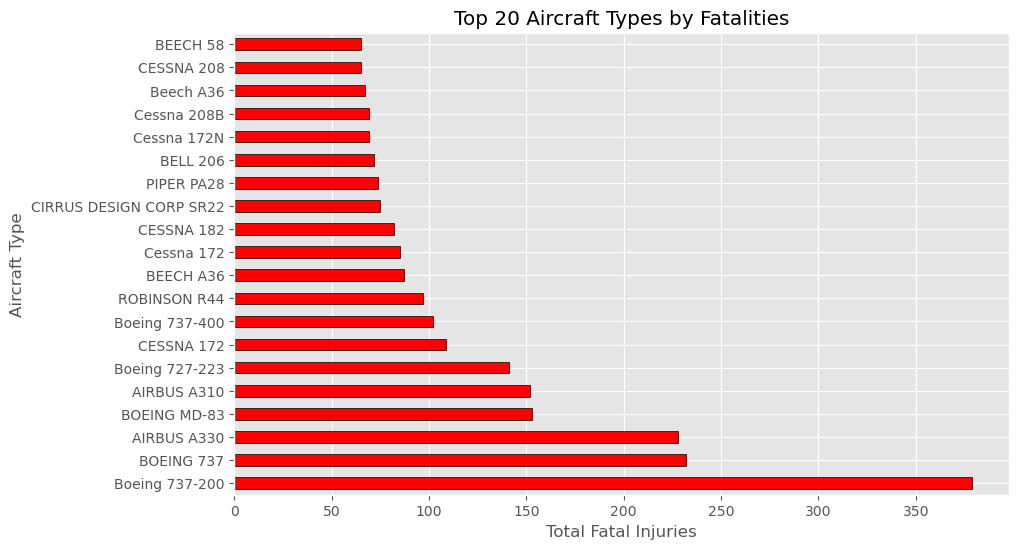

In [1108]:
fatal_df= df.groupby('Aircraft_Type')['Total_Fatal_Injuries'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))

fatal_df.plot(kind='barh',color='red', edgecolor='black')

plt.title('Top 20 Aircraft Types by Fatalities')
plt.xlabel('Total Fatal Injuries')
plt.ylabel('Aircraft Type')

plt.show()

The analysis shows that Boeing 737 and Boeing 737-200 accidents resulted in the highest number of fatalities  

* Impact of Weather

The weather condition could lickely impacting more accidents of certain aircrafts

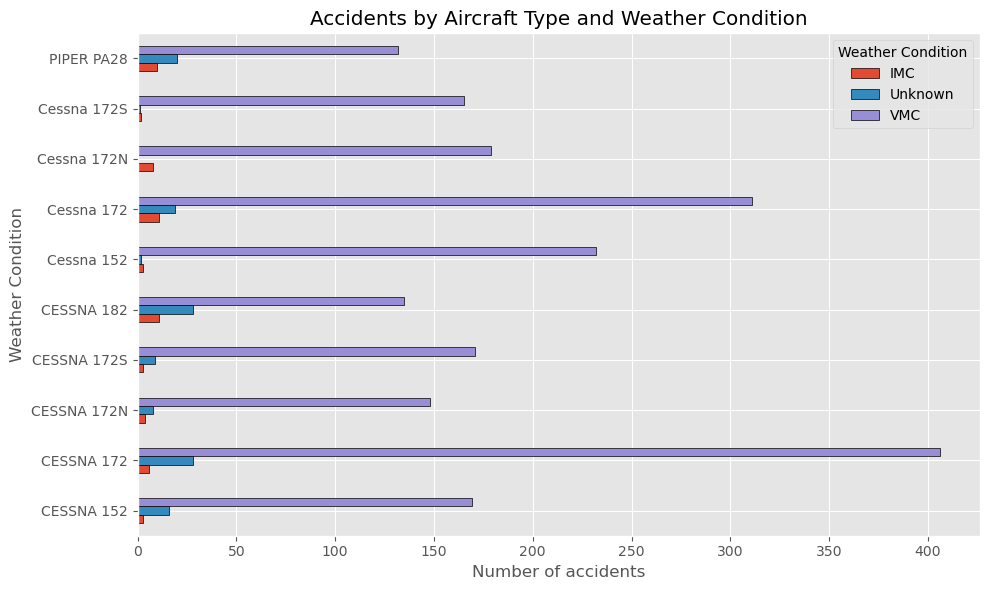

In [1109]:
top_10_Aircraft=df['Aircraft_Type'].value_counts().nlargest(10).index
#create a new dataframe with only the top 10 aircraft types 
df_top=df[df['Aircraft_Type'].isin(top_10_Aircraft)]

#groupby weather condition
weather_aircraft=df_top.groupby(['Aircraft_Type','Weather_Condition']).size().unstack(fill_value=0)

weather_aircraft.plot(kind='barh', figsize=(10, 6), edgecolor='black')
plt.title('Accidents by Aircraft Type and Weather Condition')
plt.xlabel('Number of accidents')
plt.ylabel('Weather Condition')
plt.legend(title='Weather Condition')

plt.tight_layout()
plt.show()


The above plot shows that the Cessna type aircrafts are mostly impacted by 'VMC' weather because they have the highest accidents.

* Number of engine accidents


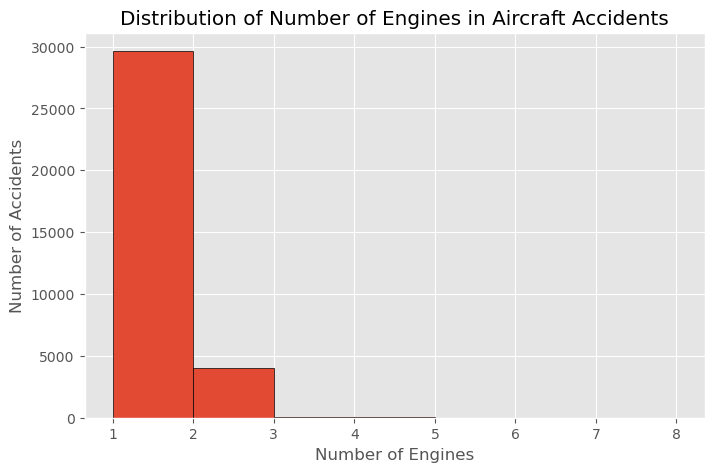

In [1110]:
Range_of_engines= len(df['Number_Of_Engines'].unique())

df['Number_Of_Engines'].plot(kind='hist', bins=range(1, Range_of_engines + 2), edgecolor='black', figsize=(8, 5))
plt.title('Distribution of Number of Engines in Aircraft Accidents')
plt.xlabel('Number of Engines')
plt.ylabel('Number of Accidents')
plt.show()


The aircrafts with a single Engines caused more accidents resulting to close to 30000 Accidents ,while aircrafts with multiple engines had significantly fewer accidents.

* Purpose of Flight

Since our client wants both private and commercial flights we will analyze accidents trends based on purpose of flight

In [1111]:
df['Purpose_Of_Flight'].value_counts()

Personal                     20423
Instructional                 4354
Unknown                       3640
Aerial Application            1519
Business                       928
Positioning                    800
Other Work Use                 568
Aerial Observation             385
Flight Test                    373
Public Aircraft                190
Ferry                          165
Executive/corporate            155
Skydiving                      138
External Load                  117
Public Aircraft - Federal      102
Banner Tow                      99
Air Race show                   94
Public Aircraft - Local         72
Public Aircraft - State         63
Air Race/show                   57
Glider Tow                      52
Firefighting                    33
Air Drop                         8
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose_Of_Flight, dtype: int64

In [1113]:
#select relevant purpose of flight for our analysis

relevant_purpose = ['Personal', 'Business', 'Executive/corporate', 'Instructional', 'Public', 'Other', 'Unknown']

df_relevant=df[df['Purpose_Of_Flight'].isin(relevant_purpose)]
df_relevant['Purpose_Of_Flight'].value_counts()

Personal               20423
Instructional           4354
Unknown                 3640
Business                 928
Executive/corporate      155
Name: Purpose_Of_Flight, dtype: int64

In [ ]:
group_relevant=df_relevant.groupby([df['Purpose_Of_Flight'],'Aircraft_Type'].size().unstack(fill_value=0)
group_relevant

SyntaxError: invalid syntax (390259452.py, line 1)

In [ ]:
#Aircraft 

# 4.2 RELATIONSHIP ANALYSIS

In [ ]:
#correlation=df.corr()
#correlation

In [ ]:
#sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns,annot=True)

In [ ]:
#sns.pairplot(df)

In [ ]:
#sns.regplot(x='',y=''hue)

# 5. CONCLUSION & RECOMENDATIONS